In [1]:
### Data-Preprocessing on NLP

import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random  ## pseudo-random number generator

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:

#We can load the text fields of the positive and negative tweets by using the module's strings() method like this:
#select the of positive and negative tweets
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')


In [4]:
#Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))


Number of positive tweets:  5000
Number of negative tweets:  5000


In [5]:
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))


The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


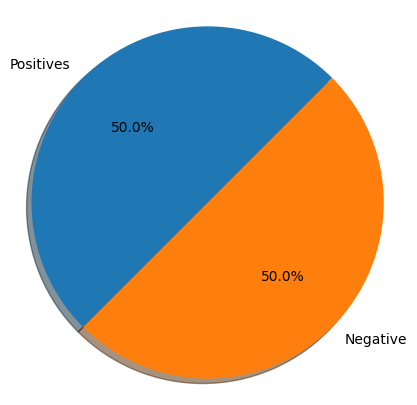

In [17]:
"""
We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's pyplot library. Let us see how to create a pie chart to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

"""
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [7]:
"""
Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

"""
# print positive in white
print('\033[89m' + all_positive_tweets[random.randint(0,5000)])

# print negative in grey
print('\033[90m' + all_negative_tweets[random.randint(0,5000)])


@btstwit_ shady af lol the management said no reservation on 11 sept :)  https://t.co/9QW1TJcnzD
i hate u &gt;.&lt; &gt;:( #H_My_King


In [8]:
"""
Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

    Tokenizing the string
    Lowercasing
    Removing stop words and punctuation
    Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

"""
#Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]### you can as well pick any tweets randomly by using random.int
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
#Let's import a few more libraries for this purpose.
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [11]:
"""Remove hyperlinks, Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')
"""

print('\033[92m' + tweet)
print('\033[90m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [12]:
"""Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:
"""

print()
print('\033[92m' + tweet2)
print('\033[90m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
"""
 This creates an instance of the TweetTokenizer with specific settings:
preserve_case=False → Converts text to lowercase (normalizes words for better analysis).
strip_handles=True → Removes Twitter handles (@usernames) to avoid user-specific data.
reduce_len=True → Reduces repeated characters (e.g., "cooooool" → "coool").


"""
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [13]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)
#  stopped @https://www.coursera.org/learn/classification-vector-spaces-in-nlp/ungradedLab/TXtyC/natural-language-preprocessing/lab?path=%2Fnotebooks%2FC1_W1_lecture_nb_01_preprocessing.ipynb

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [14]:
"""
We can see that the stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

"""
print()
print('\033[92m')
print(tweet_tokens)
print('\033[90m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [15]:
"""Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

    learn
    learning
    learned
    learnt

All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

    happy
    happiness
    happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and we will be using the PorterStemmer module which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.
"""

print()
print('\033[92m')
print(tweets_clean)
print('\033[90m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [25]:
"""
That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.
process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. In the week's assignment, you will use the function process_tweet(tweet) available in utils.py. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function process_tweet(). Let's do that in the next cell.

"""

from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
my beautiful sunflowers on a sunny friday morning off sunflowers favourites happy friday off
